<a href="https://colab.research.google.com/github/bingsen-wang/EE-Fundamentals/blob/main/ac_waveform_amplitudeFrequencyPhase_anim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>AC Waveform Illustrated with Varying Amplitude, Frequency, and Phase Angle</h1></b>

Dr. Bingsen Wang

11/30/2024
</center>

#Python Code
The Python code illustrates a basic ac waveform.

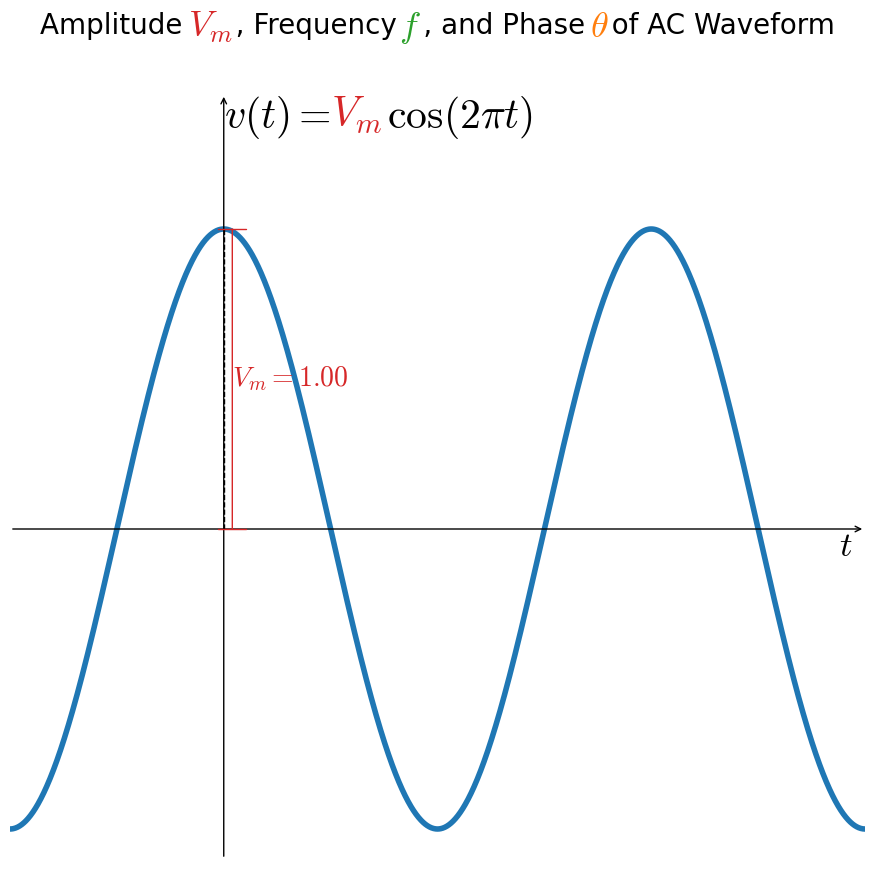

In [127]:
from os import linesep
from numpy import linspace,cos,pi
import matplotlib.pyplot as plt
from matplotlib import animation,pyplot,cm
pyplot.rcParams.update({'font.family':"sans serif",'animation.html':'jshtml',
                     'mathtext.fontset':'cm'})

Nf=4*65
xn,xm,yn,ym = -.5,1.5,-1.1,1.45
t=linspace(xn,xm,2048)
Vm_lst = list(linspace(1,.1,Nf//2))+list(linspace(.1,1,Nf//2))
f_lst = list(linspace(1,4,Nf//2))+list(linspace(4,1,Nf//2))
theta_lst = list(linspace(0,-pi,Nf//4))+list(linspace(-pi,pi,Nf//2))+list(linspace(pi,0,Nf//4))
clst = list(cm.tab10.colors) #colors of lines
fig = plt.figure(figsize=(9,9))
ax=fig.add_axes((.025,0,.95,.85),xlim=[xn,xm], ylim=[yn,ym],fc='none')
ax.axis('off')
ax.text((xn+xm)*.5,ym+.2,r'Amplitude      , Frequency   , and Phase   of AC Waveform',size=20,ha='center')
[ax.text([.02,.46,.9][k],ym+.19,['$V_m$','$f$',r'$\theta$'][k],size=26,
         ha='right',c=clst[3-k]) for k in range(3)]
[ax.annotate("", [(xm,0),(0,ym)][k], [(xn,0),(0,yn)][k],arrowprops={'arrowstyle':'->'}) for k in range(2)]
ax.text(xm,0,'$t$  ',size=25,va='top',ha='right')
line = ax.plot([],[],lw=4)[0]
line1 = ax.plot([],[],'--k',lw=1)[0]
txts = [ax.text(0,0,'',size=30,va='top') for _ in range(2)]
txts.append(ax.text(0,0,'',size=20))
an = ax.annotate("",(0,0),(0,0),arrowprops={'arrowstyle':'|-|','shrinkA':0,'shrinkB':0})
def animate(ii):
  # ii=Nf*2+3
  i,k=ii%Nf,ii//Nf
  if i==0:
      [txts[kk+1].set_color(clst[3-k]) for kk in range(2)]
      [txts[kk].set_position([(0,ym),([.25,.55,.7][k],ym)][kk]) for kk in range(2)]
      [txts[kk].set_text([[r'$v(t)=\ \quad\cos(2\pi t)$','$V_m$'],
        [r'$v(t)=\cos(2\pi\quad t)$','$f$'],
        [r'$v(t)=\cos(2\pi t+\quad)$',r'$\theta$']][k][kk]) for kk in range(2)]
      txts[2].set_horizontalalignment(['left','center','center'][k])
      txts[2].set_verticalalignment(['center','bottom','top'][k])
      an.arrow_patch.set_color(clst[3-k])
      an.xy=[(.02,0),(0,1.02),(0,-.02)][k]
  match k:
    case 0: #amplitude
      vt =Vm_lst[i]*cos(2*pi*t)
      line.set_data(t,vt)
      an.set_position((.02,Vm_lst[i]))
      txts[2].set_position([.02,Vm_lst[i]*.5])
      txts[2].set_text(f'$V_m={Vm_lst[i]:.2f}$')
    case 1: #frequency
      vt =cos(2*pi*f_lst[i]*t)
      line.set_data(t,vt)
      an.set_position((1/f_lst[i],1.02))
      txts[2].set_position([.5/f_lst[i],1.03])
      txts[2].set_text(r'$\frac{1}{'+f'{f_lst[i]:.2f}'+'}='+f'{1/f_lst[i]:.2f}$')
    case 2: #phase
      vt =cos(2*pi*t+theta_lst[i])
      line.set_data(t,vt)
      an.set_position((-theta_lst[i]/(2*pi),-.02))
      txts[2].set_position([-theta_lst[i]/(4*pi),-.02])
      txts[2].set_text(r'$\frac{-\theta}{2\pi}='+f'{-theta_lst[i]/(2*pi):.2f}$')
      line1.set_data([-theta_lst[i]/(2*pi),-theta_lst[i]/(2*pi)],[0,1])
  return
anim = animation.FuncAnimation(fig, animate, frames=Nf*3, interval=150)
anim.save("ac_waveform.mp4", writer=animation.FFMpegWriter(fps=50), dpi=200)